In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import ttest_rel

In [2]:
# Read case data
df = pd.read_excel("5. Case 4 - Paired samples t-test.xlsx")

In [3]:
# Print data head
df.head()

Customer ID  AOV_Before  AOV_After  AOV_Diff
0     43300313      114.17     126.08     11.91
1      8873290      132.21      90.30    -41.91
2     14352336       95.76     116.40     20.64
3     14864842       89.12     122.68     33.56
4     59734862      123.10     141.26     18.16

In [4]:
# Descriptive statistics
df.describe()

Customer ID  AOV_Before   AOV_After    AOV_Diff
count  2.240000e+02  224.000000  224.000000  224.000000
mean   4.935132e+07  105.450848  110.814375    5.363527
std    2.854895e+07   21.981770   20.314000   31.911967
min    1.250455e+06   28.980000   42.010000  -81.650000
25%    2.590802e+07   91.785000   97.100000  -14.590000
50%    4.840174e+07  103.990000  110.595000    6.170000
75%    7.345052e+07  121.772500  126.167500   28.275000
max    9.994677e+07  156.440000  165.930000   92.650000

In [5]:
# Create arrays
data_diff = df["AOV_Diff"].values
data_before = df["AOV_Before"].values
data_after = df["AOV_After"].values

In [6]:
print("Mean Before: " + str(data_before.mean()))
print("Mean After: " + str(data_after.mean()))
print("Difference: " + str(data_after.mean()-data_before.mean()))

Mean Before: 105.4508482142857
Mean After: 110.814375
Difference: 5.363526785714299


The average order value under the new return policy ('After': 110.81) exceeds that of the old policy ('Before': 105.45) by $5.36.

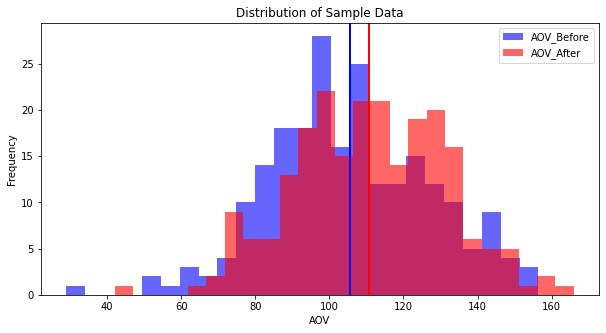

In [7]:
# Plot the histogram of before and after
plt.figure(figsize=(10,5))
plt.hist(data_before, bins=25, alpha=0.6, color='b',label="AOV_Before")
plt.hist(data_after, bins=25, alpha=0.6, color='r',label="AOV_After")

# Add the mean values for before and after
plt.axvline(data_before.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(data_after.mean(), color='r', linestyle='solid', linewidth=2)

# Label axis and add title
plt.xlabel('AOV')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')

plt.legend()
plt.show()

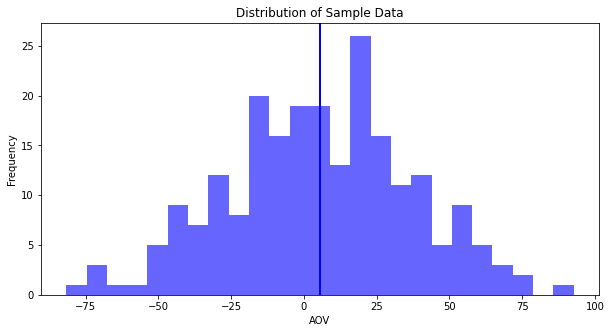

In [8]:
# Plot the histogram of the difference
plt.figure(figsize=(10,5))
plt.hist(data_diff, bins=25, alpha=0.6, color='b')
plt.axvline(data_diff.mean(), color='b', linestyle='solid', linewidth=2)

# Label axis and add title
plt.xlabel('AOV')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')

plt.show()

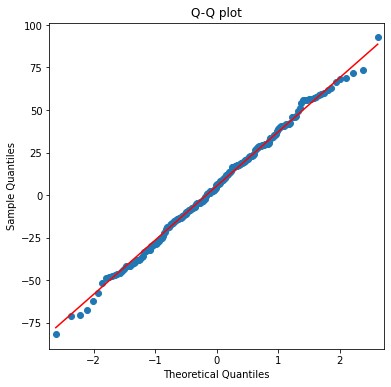

In [9]:
# Create Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_diff, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot")

# Display the chart
plt.show()

Based on the Q-Q plot, the dependent variable looks normally distributed.

In [10]:
# Run Shapiro-Wilk test for normality
shapiro(data_diff)

ShapiroResult(statistic=0.9965298771858215, pvalue=0.9022607803344727)

The p-value from the Shapiro-Wilk test (0.9023) being greater than 0.05 confirms the normal distribution of the dependent variable.

The null and alternative hypotheses are defined as follows:
-	H0: µ(AOV_Before) - µ(AOV_After) = 0 (There’s no difference in average order values before and after the new policy.)
-	H1: µ(AOV_Before) - µ(AOV_After) > 0 (The average order value before the new policy is greater than after the policy.)


Furthermore, we’ll set the significance level, alpha, at 0.05.

In [11]:
# Run paired samples t-test
ttest_rel(data_after, data_before,alternative= "greater")

Ttest_relResult(statistic=2.5154801271455183, pvalue=0.006295854693981037)

Since the p-value (0.0063) is less than the alpha value (0.05), we reject the null hypothesis in favor of the alternative. Therefore, we can assert that the new return policy positively influenced sales—boosting the average order value (AOV) by $5.36.